<a href="https://colab.research.google.com/github/pana1010/CRIS-internship-project/blob/main/cris_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
global data
# Load data, handling errors
try:
    data = pd.read_csv('/content/drive/MyDrive/main_block_2023_data.csv', on_bad_lines='skip')  # Skip bad lines using on_bad_lines
    # Display basic info
    print(data.info())
    print(data.describe())
except pd.errors.ParserError as e:
    print(f"Error reading CSV: {e}")
    # Additional debugging: print a few lines around the problematic row
    with open('/content/drive/MyDrive/main_block_2023_data.csv', 'r') as f:
        for i, line in enumerate(f):
            if i in range(96052, 96056):  # Print lines around row 96054
                print(line.strip())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1420729 entries, 0 to 1420728
Data columns (total 24 columns):
 #   Column            Non-Null Count    Dtype  
---  ------            --------------    -----  
 0   rlyzone           1420729 non-null  object 
 1   dvsn              1420729 non-null  object 
 2   dvsncontrol       1420729 non-null  object 
 3   blckrstnid        1420729 non-null  object 
 4   boardid           1420729 non-null  int64  
 5   boardname         1420528 non-null  object 
 6   subsection        1415268 non-null  object 
 7   blcksctnsttnflag  1420729 non-null  object 
 8   fromsttn          1420729 non-null  object 
 9   tosttn            907641 non-null   object 
 10  dept              1420729 non-null  object 
 11  subtype           1420435 non-null  object 
 12  remark            1119657 non-null  object 
 13  drtn              907640 non-null   object 
 14  lineno            1418588 non-null  float64
 15  rqststrttime      1420729 non-null  object 
 16  

In [ ]:
data.size

34097496

In [ ]:
data.columns

Index(['rlyzone', 'dvsn', 'dvsncontrol', 'blckrstnid', 'boardid', 'boardname',
       'subsection', 'blcksctnsttnflag', 'fromsttn', 'tosttn', 'dept',
       'subtype', 'remark', 'drtn', 'lineno', 'rqststrttime', 'rqstendtime',
       'prmtstrttime', 'prmtendtime', 'extnbrstflag', 'permduration',
       'extndurn', 'burst', 'userid'],
      dtype='object')

In [ ]:
data.shape

(1420729, 24)

In [ ]:
data.head(2)

,rlyzone,dvsn,dvsncontrol,blckrstnid,boardid,boardname,subsection,blcksctnsttnflag,fromsttn,tosttn,...,lineno,rqststrttime,rqstendtime,prmtstrttime,prmtendtime,extnbrstflag,permduration,extndurn,burst,userid
0,CR,BB,BB,BB0322222,1,SE,KYN-KJT,B,KJT,BVS,...,2.0,08-03-23 00:30:00,09-03-23 01:30:00,08-03-23 00:30:00,09-03-23 01:30:00,A,1500,0,0,KS
1,CR,BB,BB,BB0322223,1,SE,KYN-KJT,B,BVS,NRL,...,2.0,08-03-23 00:30:00,09-03-23 01:30:00,08-03-23 00:30:00,09-03-23 01:30:00,A,1500,0,0,KS


In [ ]:
data.isnull().sum()

,0
rlyzone,0
dvsn,0
dvsncontrol,0
blckrstnid,0
boardid,0
boardname,201
subsection,5461
blcksctnsttnflag,0
fromsttn,0
tosttn,513088


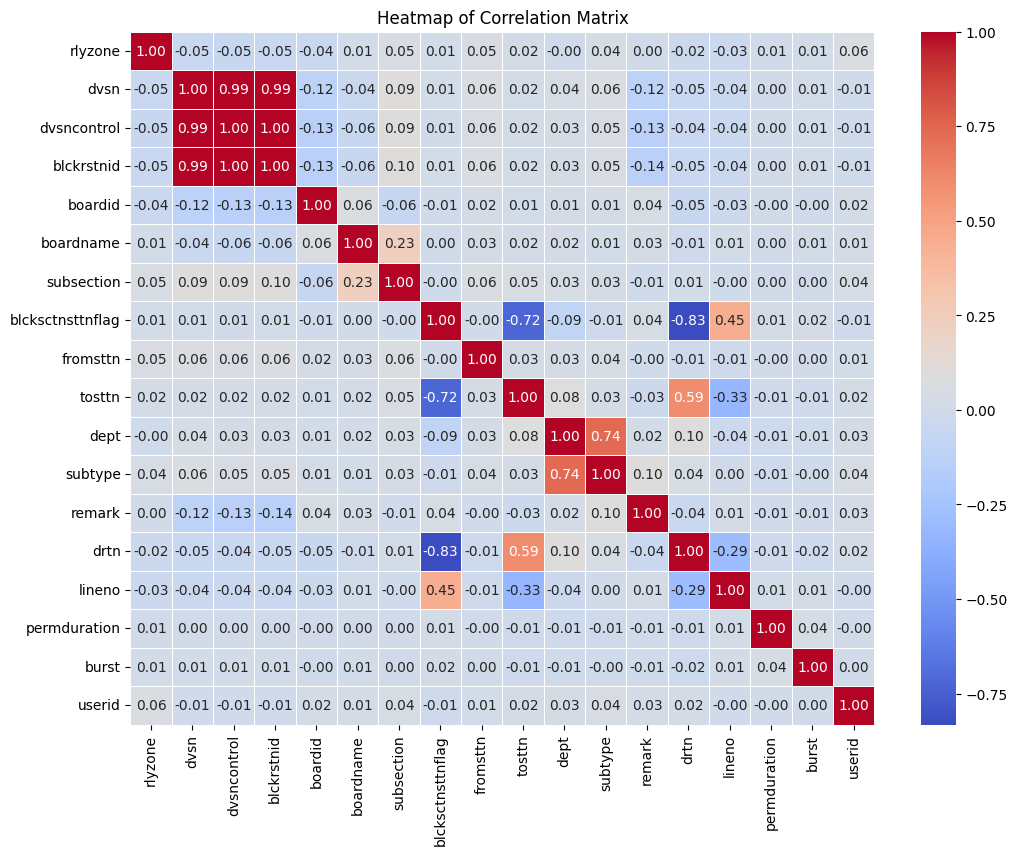

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder

# Load the data
data_path = '/content/drive/MyDrive/main_block_2023_data.csv'
df = pd.read_csv(data_path)

# Drop unnecessary columns for the burst time prediction
df.drop(columns=['rqststrttime', 'rqstendtime', 'prmtstrttime', 'prmtendtime','extndurn','extnbrstflag'], inplace=True)

# Handle missing values if any
df.fillna(0, inplace=True)

# Identify categorical columns
categorical_cols = df.select_dtypes(include=['object']).columns.tolist()

# Convert categorical columns to strings to ensure uniformity
for col in categorical_cols:
    df[col] = df[col].astype(str)

# Label encode categorical features
label_encoders = {}
for col in categorical_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le

# Compute the correlation matrix
correlation_matrix = df.corr()

# Set up the matplotlib figure
plt.figure(figsize=(12,9))

# Draw the heatmap
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', linewidths=0.5)

# Show the plot
plt.title('Heatmap of Correlation Matrix')
plt.show()


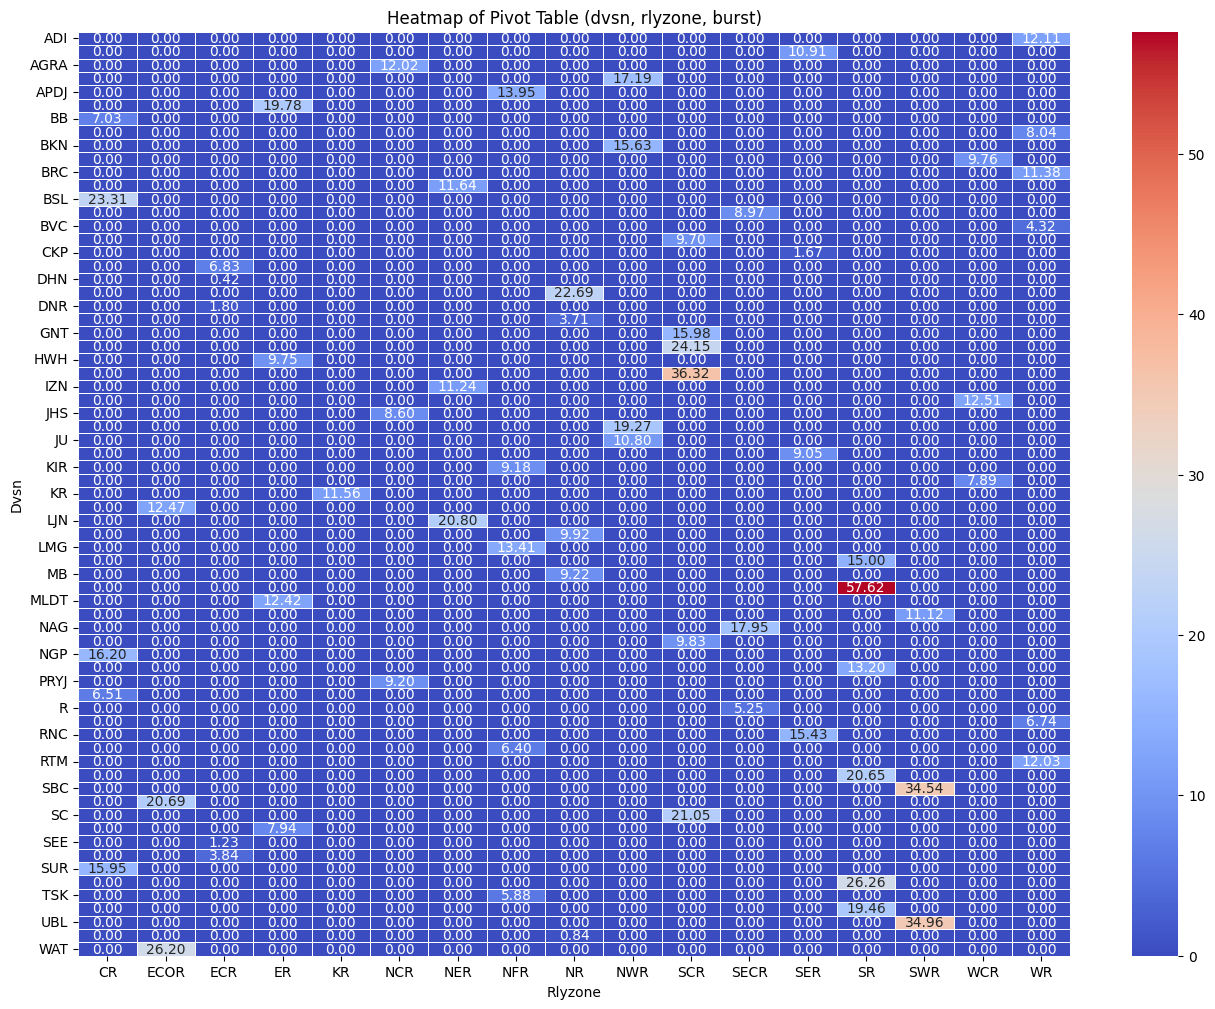

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the data
data_path = '/content/drive/MyDrive/main_block_2023_data.csv'
df = pd.read_csv(data_path, nrows=10000)

# Drop unnecessary columns for the burst time prediction
df.drop(columns=['rqststrttime', 'rqstendtime', 'prmtstrttime', 'prmtendtime'], inplace=True)

# Handle missing values if any
df.fillna(0, inplace=True)

# Convert categorical columns to strings to ensure uniformity
df['dvsn'] = df['dvsn'].astype(str)
df['rlyzone'] = df['rlyzone'].astype(str)

# Create a pivot table
pivot_table = df.pivot_table(values='burst', index='dvsn', columns='rlyzone', aggfunc='mean', fill_value=0)

# Set up the matplotlib figure
plt.figure(figsize=(16, 12))

# Draw the heatmap
sns.heatmap(pivot_table, annot=True, fmt=".2f", cmap='coolwarm', linewidths=0.5)

# Show the plot
plt.title('Heatmap of Pivot Table (dvsn, rlyzone, burst)')
plt.xlabel('Rlyzone')
plt.ylabel('Dvsn')
plt.show()


In [ ]:
result = data.groupby('subsection').size().reset_index(name='count')#UTR-BSB
result_sorted = result.sort_values(by='count', ascending=False)
print(result_sorted)
 #pd.pivot_table(data,index=['dvsn'],values=['burst'],sort=True,ascending=False)

    subsection  count
685   SSL-SYWN  12302
746    UTR-BSB  10823
166    CYZ-SNS  10709
506   NLPD-NDL  10050
486   NAD-KOTA   9623
..         ...    ...
292    JBO-VAA      1
55     BCB-JBO      1
431    MHQ-KNF      1
430    MHQ-JNN      1
75    BJMD-GUA      1

[778 rows x 2 columns]


burst
0       4826
5        764
10       523
15       381
20       270
        ... 
1661       1
158        1
66         1
177        1
900        1
Name: count, Length: 189, dtype: int64


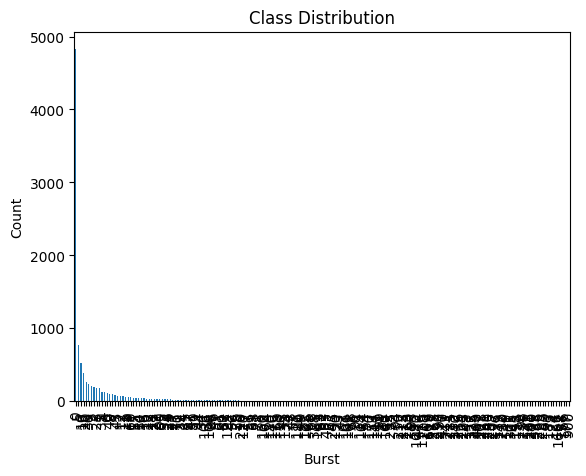

In [ ]:
# Analyze the distribution of the target variable
class_distribution = df['burst'].value_counts()
print(class_distribution)

# Plot the class distribution
import matplotlib.pyplot as plt

class_distribution.plot(kind='bar')
plt.xlabel('Burst')
plt.ylabel('Count')
plt.title('Class Distribution')
plt.show()


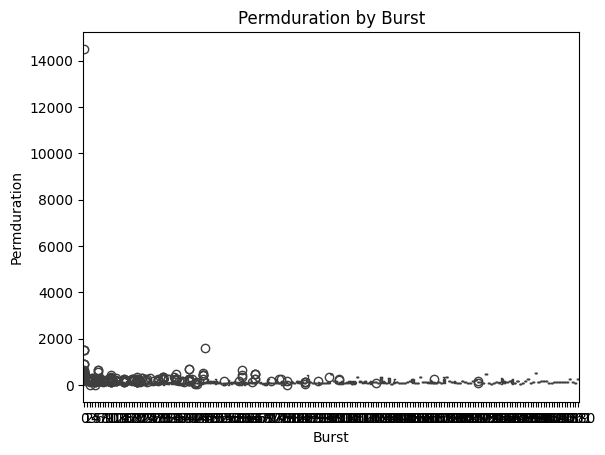

In [ ]:
# Example visualization: Distribution of 'permduration' by 'burst'
import seaborn as sns

sns.boxplot(x='burst', y='permduration', data=df)
plt.xlabel('Burst')
plt.ylabel('Permduration')
plt.title('Permduration by Burst')
plt.show()


In [ ]:
import pandas as pd

# Load the dataset
file_path = '/content/drive/MyDrive/main_block_2023_data.csv'
df = pd.read_csv(file_path)

# Filter rows where subsection is 'UTR-BSB'
df = df[df['subsection'] == 'UTR-BSB']

df.drop(columns=['dvsncontrol', 'blckrstnid','remark','subsection','rqststrttime','fromsttn','userid',
                 'rqstendtime', 'prmtstrttime', 'prmtendtime','tosttn','subtype','boardid','extndurn', 'extnbrstflag'], inplace=True)
# Display the filtered DataFrame
print(df.head(20))


     rlyzone dvsn    boardname blcksctnsttnflag           dept drtn  lineno  \
108       NR  LKO  LKO-SLN-BSB                B          POWER   DN     2.0   
109       NR  LKO  LKO-SLN-BSB                B          POWER   DN     2.0   
110       NR  LKO  LKO-SLN-BSB                B          POWER   DN     2.0   
218       NR  LKO  LKO-SLN-BSB                B  ENGG-OPENLINE   UP     1.0   
243       NR  LKO  LKO-SLN-BSB                B  ENGG-OPENLINE   DN     2.0   
404       NR  LKO  LKO-SLN-BSB                B  ENGG-OPENLINE   DN     2.0   
487       NR  LKO  LKO-SLN-BSB                B    TRACMACHINE   UP     1.0   
488       NR  LKO  LKO-SLN-BSB                B  ENGG-OPENLINE   UP     1.0   
489       NR  LKO  LKO-SLN-BSB                B          POWER   UP     1.0   
490       NR  LKO  LKO-SLN-BSB                B          POWER   UP     1.0   
571       NR  LKO  LKO-SLN-BSB                B  ENGG-OPENLINE   DN     2.0   
619       NR  LKO  LKO-SLN-BSB                S  ENG

By Logistic Regression

In [ ]:
import pandas as pd
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.model_selection import train_test_split, RandomizedSearchCV, StratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from imblearn.over_sampling import SMOTE
import numpy as np

# Handle missing values if any
df.fillna(0, inplace=True)

# Identify categorical columns
categorical_cols = df.select_dtypes(include=['object']).columns.tolist()

# Convert categorical columns to strings to ensure uniformity
for col in categorical_cols:
    df[col] = df[col].astype(str)

# Split the data
X = df.drop(columns=['burst'])
y = df['burst']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the preprocessing pipeline for numerical and categorical features
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), ['permduration']),
        ('cat', OneHotEncoder(handle_unknown='ignore', sparse_output=False), categorical_cols)
    ])

# Apply preprocessing to the data
X_train_preprocessed = preprocessor.fit_transform(X_train)
X_test_preprocessed = preprocessor.transform(X_test)

# Ensure we have enough samples for SMOTE
min_samples = min(y_train.value_counts())
k_neighbors = max(min_samples - 1, 1)

# Handle class imbalance with SMOTE
if min_samples > 1:
    smote = SMOTE(random_state=42, k_neighbors=k_neighbors)
    X_train_resampled, y_train_resampled = smote.fit_resample(X_train_preprocessed, y_train)
else:
    X_train_resampled, y_train_resampled = X_train_preprocessed, y_train

# Logistic regression model
model = LogisticRegression(max_iter=5000, solver='saga', n_jobs=-1)

# Reduced hyperparameter tuning grid
param_grid = {
    'penalty': ['l1', 'l2', 'elasticnet', 'none'],
    'C': np.logspace(-4, 4, 10),  # Reduced range for faster search
    'l1_ratio': np.linspace(0, 1, 5)  # Only used if penalty='elasticnet'
}

# Adjust the number of folds based on class distribution
n_splits = 2 if min_samples < 2 else 3  # Adjust based on the smallest class size

# StratifiedKFold for better handling of class imbalance
cv = StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=42)

# Custom scorer to handle the penalty and l1_ratio issue
def custom_scorer(estimator, X, y):
    if estimator.penalty == 'elasticnet' and estimator.l1_ratio is None:
        return 0
    return estimator.score(X, y)

# Randomized search with cross-validation
clf = RandomizedSearchCV(model, param_grid, n_iter=40, cv=cv, verbose=1, n_jobs=-1, scoring=custom_scorer)  # Reduced n_iter for faster search
clf.fit(X_train_resampled, y_train_resampled)

# Best parameters found by RandomizedSearchCV
print(f"Best parameters found: {clf.best_params_}")

# Make predictions using the best model
best_model = clf.best_estimator_
predictions = best_model.predict(X_test_preprocessed)

# Calculate accuracy
accuracy = accuracy_score(y_test, predictions)
print(f'Accuracy: {accuracy * 100:.2f}%')

# Detailed classification report
print(classification_report(y_test, predictions))

# Display a sample of predictions vs actual values
print("Some predictions vs actual values:")
for i in range(10):  # Print the first 10 predictions for comparison
    print(f"Prediction: {predictions[i]}, Actual: {y_test.values[i]}")

# Save predictions to a CSV file if needed
predictions_df = pd.DataFrame({'Actual': y_test.values, 'Predicted': predictions})
predictions_df.to_csv('/content/predictions.csv', index=False)
print("Predictions saved to predictions.csv")


Fitting 2 folds for each of 40 candidates, totalling 80 fits


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:737: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=2.
  warnings.warn(


By random Forest Regression

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.metrics import mean_absolute_error, mean_squared_error, classification_report
from imblearn.over_sampling import SMOTE
from collections import Counter


# Identify categorical and numerical columns
categorical_cols = df.select_dtypes(include=['object']).columns
numerical_cols = df.select_dtypes(include=['number']).columns.drop('burst')

# Separate features and target variable
X = df.drop('burst', axis=1)
y = df['burst']

# Create a preprocessing pipeline
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_cols),
        ('num', Pipeline(steps=[
            ('imputer', SimpleImputer(strategy='median')),
            ('scaler', StandardScaler())
        ]), numerical_cols)
    ]
)

# Preprocess the data
X_preprocessed = preprocessor.fit_transform(X)

# Identify classes with only one sample
class_counts = Counter(y)
small_classes = [cls for cls, count in class_counts.items() if count == 1]

# Separate small classes
mask = y.isin(small_classes)
X_small = X_preprocessed[mask]
y_small = y[mask]

# Separate the rest of the data
X_rest = X_preprocessed[~mask]
y_rest = y[~mask]

# Apply SMOTE on the rest of the data
smote = SMOTE(random_state=42, k_neighbors=1)
X_resampled_rest, y_resampled_rest = smote.fit_resample(X_rest, y_rest)

# Combine the resampled data with the small classes data
X_resampled = np.vstack((X_resampled_rest, X_small))
y_resampled = np.hstack((y_resampled_rest, y_small))

# Ensure small classes have at least 2 samples by duplicating them if necessary
for cls in small_classes:
    if sum(y_resampled == cls) == 1:
        X_resampled = np.vstack((X_resampled, X_resampled[y_resampled == cls]))
        y_resampled = np.hstack((y_resampled, [cls]))

# Split the data into train and test sets without stratification
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

# Create a pipeline with the preprocessor and the RandomForestRegressor model
pipeline = Pipeline(steps=[
    ('regressor', RandomForestRegressor(random_state=42))
])

# Define the parameter grid for GridSearchCV
param_grid = {
    'regressor__n_estimators': [50, 100],  # Reduced for speed
    'regressor__max_depth': [None, 10],  # Reduced for speed
    'regressor__min_samples_split': [2, 5],  # Reduced for speed
    'regressor__min_samples_leaf': [1, 2]  # Reduced for speed
}

# Create a GridSearchCV object
grid_search = GridSearchCV(pipeline, param_grid, cv=StratifiedKFold(n_splits=3, shuffle=True, random_state=42), scoring='neg_mean_squared_error', n_jobs=-1)

# Fit the model
grid_search.fit(X_train, y_train)

# Get the best model
best_model = grid_search.best_estimator_

# Predict
predicted = best_model.predict(X_test)

# Calculate metrics
mae = mean_absolute_error(y_test, predicted)
rmse = np.sqrt(mean_squared_error(y_test, predicted))

# Print metrics
print(f'MAE: {mae}')
print(f'RMSE: {rmse}')

# Create a DataFrame of actual vs predicted values
results = pd.DataFrame({'Actual': y_test, 'Predicted': predicted})

# Save the results to a CSV file
results.to_csv('/content/predictions2.csv', index=False)

print("Results saved to 'predicted_vs_actual_rf.csv'")

# Classification report
y_test_class = np.round(y_test / 10) * 10
predicted_class = np.round(predicted / 10) * 10
print(classification_report(y_test_class, predicted_class))


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:737: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=3.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/joblib/externals/loky/process_executor.py:752: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


MAE: 18.94537779359268
RMSE: 56.81204748793833
Results saved to 'predicted_vs_actual_rf.csv'
              precision    recall  f1-score   support

         0.0       0.95      0.30      0.45     11048
        10.0       0.69      0.61      0.65     16300
        20.0       0.61      0.70      0.65     16348
        30.0       0.37      0.79      0.50      9142
        40.0       0.60      0.37      0.46      9151
        50.0       0.75      0.67      0.71      7305
        60.0       0.52      0.60      0.56      9116
        70.0       0.97      0.42      0.59      5555
        80.0       0.36      0.75      0.48      5454
        90.0       0.99      0.68      0.81      1827
       100.0       1.00      0.66      0.79      5551
       110.0       0.00      0.00      0.00         0
       120.0       0.99      0.59      0.74      3545
       130.0       0.00      0.00      0.00         0
       140.0       0.95      0.62      0.75      3678
       150.0       0.00      0.00      0.0

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.

By random Forest Classifier

burst
0       9117
1         12
2          6
3         22
4         25
        ... 
510        2
624        2
1562       1
1610       1
3947       1
Name: count, Length: 84, dtype: int64


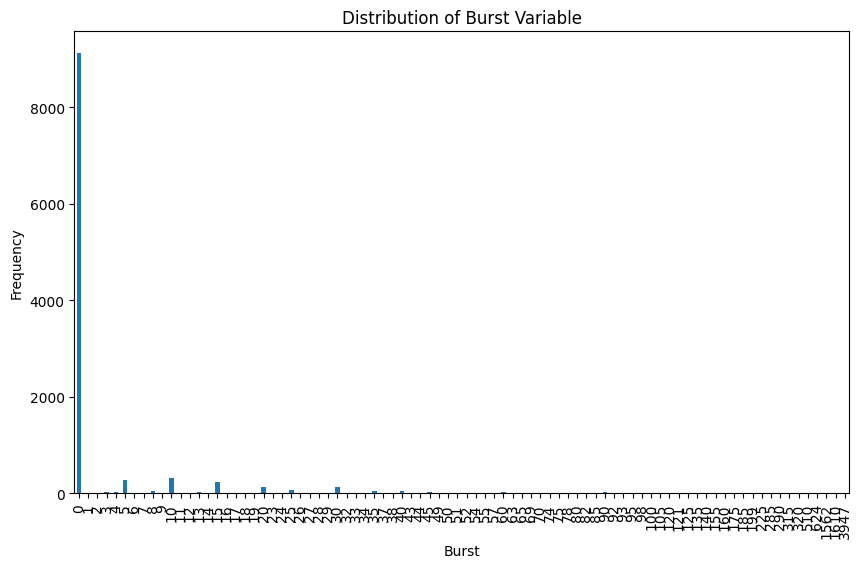

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:737: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=3.
  warnings.warn(


Accuracy: 0.7446407205530444
              precision    recall  f1-score   support

           0       0.77      0.18      0.29      1809
           1       0.68      0.57      0.62      1837
           2       0.68      1.00      0.81      1821
           3       0.37      0.36      0.37      1862
           4       0.63      0.41      0.50      1885
           5       0.56      0.30      0.39      1834
           6       0.95      0.63      0.76      1813
           7       0.77      0.75      0.76      1796
           8       0.65      0.33      0.43      1859
           9       0.79      0.52      0.63      1787
          10       0.50      0.36      0.42      1829
          11       0.74      0.38      0.50      1793
          12       0.67      0.45      0.54      1814
          13       0.67      0.55      0.61      1798
          14       0.55      1.00      0.71      1811
          15       0.70      0.21      0.32      1839
          16       0.90      0.99      0.94      179

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.

Results saved to 'predicted_vs_actual_rf_classifier.csv'


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from imblearn.over_sampling import SMOTE
from collections import Counter

# Check the distribution of the target variable
burst_distribution = df['burst'].value_counts().sort_index()
print(burst_distribution)

# Plot the distribution
plt.figure(figsize=(10, 6))
burst_distribution.plot(kind='bar')
plt.xlabel('Burst')
plt.ylabel('Frequency')
plt.title('Distribution of Burst Variable')
plt.show()

# Identify categorical and numerical columns
categorical_cols = df.select_dtypes(include=['object']).columns
numerical_cols = df.select_dtypes(include=['number']).columns.drop('burst')

# Separate features and target variable
X = df.drop('burst', axis=1)
y = df['burst']

# Create a preprocessing pipeline
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_cols),
        ('num', Pipeline(steps=[
            ('imputer', SimpleImputer(strategy='median')),
            ('scaler', StandardScaler())
        ]), numerical_cols)
    ]
)

# Preprocess the data
X_preprocessed = preprocessor.fit_transform(X)

# Identify classes with only one sample
class_counts = Counter(y)
small_classes = [cls for cls, count in class_counts.items() if count == 1]

# Separate small classes
mask = y.isin(small_classes)
X_small = X_preprocessed[mask]
y_small = y[mask]

# Separate the rest of the data
X_rest = X_preprocessed[~mask]
y_rest = y[~mask]

# Apply SMOTE on the rest of the data
smote = SMOTE(random_state=42, k_neighbors=1)
X_resampled_rest, y_resampled_rest = smote.fit_resample(X_rest, y_rest)

# Combine the resampled data with the small classes data
X_resampled = np.vstack((X_resampled_rest, X_small))
y_resampled = np.hstack((y_resampled_rest, y_small))

# Ensure small classes have at least 2 samples by duplicating them if necessary
for cls in small_classes:
    if sum(y_resampled == cls) == 1:
        X_resampled = np.vstack((X_resampled, X_resampled[y_resampled == cls]))
        y_resampled = np.hstack((y_resampled, [cls]))

# Split the data into train and test sets without stratification
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

# Create a pipeline with the preprocessor and the RandomForestClassifier model
pipeline = Pipeline(steps=[
    ('classifier', RandomForestClassifier(random_state=42))
])

# Define the parameter grid for GridSearchCV
param_grid = {
    'classifier__n_estimators': [50, 100],  # Reduced for speed
    'classifier__max_depth': [None, 10],  # Reduced for speed
    'classifier__min_samples_split': [2, 5],  # Reduced for speed
    'classifier__min_samples_leaf': [1, 2]  # Reduced for speed
}

# Create a GridSearchCV object
grid_search = GridSearchCV(pipeline, param_grid, cv=StratifiedKFold(n_splits=3, shuffle=True, random_state=42), scoring='accuracy', n_jobs=-1)

# Fit the model
grid_search.fit(X_train, y_train)

# Get the best model
best_model = grid_search.best_estimator_

# Predict
y_pred = best_model.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')

# Classification report
print(classification_report(y_test, y_pred))

# Confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print('Confusion Matrix:')
print(conf_matrix)

# Create a DataFrame of actual vs predicted values
results = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})

# Save the results to a CSV file
results.to_csv('/content/predictions(RFC).csv', index=False)

print("Results saved to 'predicted_vs_actual_rf_classifier.csv'")


By using neural networks

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from imblearn.over_sampling import SMOTE
from collections import Counter

# Identify categorical and numerical columns
categorical_cols = df.select_dtypes(include=['object']).columns
numerical_cols = df.select_dtypes(include=['number']).columns.drop('burst')

# Separate features and target variable
X = df.drop('burst', axis=1)
y = df['burst']

# Create a preprocessing pipeline
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_cols),
        ('num', Pipeline(steps=[
            ('imputer', SimpleImputer(strategy='median')),
            ('scaler', StandardScaler())
        ]), numerical_cols)
    ]
)

# Preprocess the data
X_preprocessed = preprocessor.fit_transform(X)

# Identify classes with only one sample
class_counts = Counter(y)
small_classes = [cls for cls, count in class_counts.items() if count == 1]

# Separate small classes
mask = y.isin(small_classes)
X_small = X_preprocessed[mask]
y_small = y[mask]

# Separate the rest of the data
X_rest = X_preprocessed[~mask]
y_rest = y[~mask]

# Apply SMOTE on the rest of the data
smote = SMOTE(random_state=42, k_neighbors=1)
X_resampled_rest, y_resampled_rest = smote.fit_resample(X_rest, y_rest)

# Combine the resampled data with the small classes data
X_resampled = np.vstack((X_resampled_rest, X_small))
y_resampled = np.hstack((y_resampled_rest, y_small))

# Ensure small classes have at least 2 samples by duplicating them if necessary
for cls in small_classes:
    if sum(y_resampled == cls) == 1:
        X_resampled = np.vstack((X_resampled, X_resampled[y_resampled == cls]))
        y_resampled = np.hstack((y_resampled, [cls]))

# Split the data into train and test sets without stratification
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

# Create a pipeline with the preprocessor and the MLPClassifier model
pipeline = Pipeline(steps=[
    ('classifier', MLPClassifier(random_state=42, max_iter=300))
])

# Define the parameter grid for GridSearchCV
param_grid = {
    'classifier__hidden_layer_sizes': [(50,), (100,), (50, 50)],  # Example layer sizes
    'classifier__activation': ['relu', 'tanh'],
    'classifier__solver': ['adam', 'sgd'],
    'classifier__alpha': [0.0001, 0.001],  # Regularization parameter
    'classifier__learning_rate': ['constant', 'adaptive']
}

# Create a GridSearchCV object
grid_search = GridSearchCV(pipeline, param_grid, cv=StratifiedKFold(n_splits=3, shuffle=True, random_state=42), scoring='accuracy', n_jobs=-1)

# Fit the model
grid_search.fit(X_train, y_train)

# Get the best model
best_model = grid_search.best_estimator_

# Predict
y_pred = best_model.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')

# Classification report
print(classification_report(y_test, y_pred))

# Confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print('Confusion Matrix:')
print(conf_matrix)

# Create a DataFrame of actual vs predicted values
results = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})

# Save the results to a CSV file
results.to_csv('/content/predictions(NNC).csv', index=False)

print("Results saved to 'predicted_vs_actual_nn_classifier.csv'")


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:737: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=3.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


Accuracy: 0.737918771603297
              precision    recall  f1-score   support

           0       0.51      0.06      0.11      1809
           1       0.68      0.56      0.61      1837
           2       0.66      1.00      0.80      1821
           3       0.36      0.30      0.33      1862
           4       0.60      0.40      0.48      1885
           5       0.47      0.24      0.31      1834
           6       0.88      0.62      0.73      1813
           7       0.81      0.73      0.77      1796
           8       0.61      0.32      0.42      1859
           9       0.81      0.57      0.67      1787
          10       0.74      0.24      0.36      1829
          11       0.73      0.38      0.50      1793
          12       0.62      0.50      0.55      1814
          13       0.66      0.55      0.60      1798
          14       0.55      1.00      0.71      1811
          15       0.64      0.15      0.24      1839
          16       0.91      0.98      0.94      1792

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Results saved to 'predicted_vs_actual_nn_classifier.csv'


By Using svm classifier

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold
from sklearn.svm import SVC
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from imblearn.over_sampling import SMOTE
from collections import Counter

# Identify categorical and numerical columns
categorical_cols = df.select_dtypes(include=['object']).columns
numerical_cols = df.select_dtypes(include=['number']).columns.drop('burst')

# Separate features and target variable
X = df.drop('burst', axis=1)
y = df['burst']

# Create a preprocessing pipeline
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_cols),
        ('num', Pipeline(steps=[
            ('imputer', SimpleImputer(strategy='median')),
            ('scaler', StandardScaler())
        ]), numerical_cols)
    ]
)

# Preprocess the data
X_preprocessed = preprocessor.fit_transform(X)

# Identify classes with only one sample
class_counts = Counter(y)
small_classes = [cls for cls, count in class_counts.items() if count == 1]

# Separate small classes
mask = y.isin(small_classes)
X_small = X_preprocessed[mask]
y_small = y[mask]

# Separate the rest of the data
X_rest = X_preprocessed[~mask]
y_rest = y[~mask]

# Apply SMOTE on the rest of the data
smote = SMOTE(random_state=42, k_neighbors=1)
X_resampled_rest, y_resampled_rest = smote.fit_resample(X_rest, y_rest)

# Combine the resampled data with the small classes data
X_resampled = np.vstack((X_resampled_rest, X_small))
y_resampled = np.hstack((y_resampled_rest, y_small))

# Ensure small classes have at least 2 samples by duplicating them if necessary
for cls in small_classes:
    if sum(y_resampled == cls) == 1:
        X_resampled = np.vstack((X_resampled, X_resampled[y_resampled == cls]))
        y_resampled = np.hstack((y_resampled, [cls]))

# Split the data into train and test sets without stratification
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

# Define the SVM model with simplified parameters
svm_model = SVC(kernel='linear', C=1, random_state=42)

# Train the SVM model
svm_model.fit(X_train, y_train)

# Predict
y_pred = svm_model.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')

# Classification report
print(classification_report(y_test, y_pred))

# Confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print('Confusion Matrix:')
print(conf_matrix)

# Create a DataFrame of actual vs predicted values
results = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})

# Print 10 actual vs predicted burst values
print("Sample of 10 actual vs predicted burst values:")
print(results.sample(10))

# Save the results to a CSV file
results.to_csv('predicted_vs_actual_svm_classifier.csv', index=False)

print("Results saved to 'predicted_vs_actual_svm_classifier.csv'")


SVM Regression

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_predict
from sklearn.svm import SVR
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.metrics import mean_absolute_error, mean_squared_error, classification_report
import numpy as np


# Separate features and target variable
X = df.drop('burst', axis=1)
y = df['burst']

# Identify categorical and numerical columns
categorical_cols = X.select_dtypes(include=['object']).columns
numerical_cols = X.select_dtypes(include=['number']).columns

# Create a preprocessing pipeline
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_cols),
        ('num', Pipeline(steps=[
            ('imputer', SimpleImputer(strategy='median')),
            ('scaler', StandardScaler())
        ]), numerical_cols)
    ]
)

# Create a pipeline with the preprocessor and the SVR model
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', SVR())
])

# Define the parameter grid for GridSearchCV
param_grid = {
    'regressor__C': [0.1, 1, 10],
    'regressor__gamma': [0.01, 0.1, 1],
    'regressor__kernel': ['linear', 'rbf']
}

# Create a GridSearchCV object
grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit the model
grid_search.fit(X_train, y_train)

# Get the best model
best_model = grid_search.best_estimator_

# Predict
predicted = best_model.predict(X_test)

# Calculate metrics
mae = mean_absolute_error(y_test, predicted)
rmse = np.sqrt(mean_squared_error(y_test, predicted))

# Print metrics
print(f'MAE: {mae}')
print(f'RMSE: {rmse}')

# Create a DataFrame of actual vs predicted values
results = pd.DataFrame({'Actual': y_test, 'Predicted': predicted})

# Save the results to a CSV file
results.to_csv('predicted_vs_actual3.csv', index=False)

print("Results saved to 'predicted_vs_actual_svr.csv'")

# Classification report
y_test_class = np.round(y_test / 10) * 10
predicted_class = np.round(predicted / 10) * 10
print(classification_report(y_test_class, predicted_class))


MAE: 4.272392422240874
RMSE: 22.148606474453707
Results saved to 'predicted_vs_actual_svr.csv'
              precision    recall  f1-score   support

         0.0       0.88      1.00      0.93      1901
        10.0       0.00      0.00      0.00        93
        20.0       0.00      0.00      0.00        85
        30.0       0.00      0.00      0.00        27
        40.0       0.00      0.00      0.00        16
        50.0       0.00      0.00      0.00         4
        60.0       0.00      0.00      0.00        11
        70.0       0.00      0.00      0.00         5
        80.0       0.00      0.00      0.00         5
        90.0       0.00      0.00      0.00         5
       120.0       0.00      0.00      0.00         2
       140.0       0.00      0.00      0.00         3
       160.0       0.00      0.00      0.00         1
       180.0       0.00      0.00      0.00         3
       200.0       0.00      0.00      0.00         1
       320.0       0.00      0.00      0

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


By Gradient Boosting

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_predict
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

# Separate features and target variable
X = df.drop('burst', axis=1)
y = df['burst']

# Identify categorical and numerical columns
categorical_cols = X.select_dtypes(include=['object']).columns
numerical_cols = X.select_dtypes(include=['number']).columns

# Create a preprocessing pipeline
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_cols),
        ('num', Pipeline(steps=[
            ('imputer', SimpleImputer(strategy='median')),
            ('scaler', StandardScaler())
        ]), numerical_cols)
    ]
)

# Create a pipeline with the preprocessor and the model
model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', GradientBoostingRegressor(n_estimators=200, learning_rate=0.1, max_depth=3, random_state=42))
])

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit the model
model.fit(X_train, y_train)

# Predict
predicted = model.predict(X_test)

# Calculate metrics
mae = mean_absolute_error(y_test, predicted)
rmse = np.sqrt(mean_squared_error(y_test, predicted))

# Print metrics
print(f'MAE: {mae}')
print(f'RMSE: {rmse}')

# Create a DataFrame of actual vs predicted values
results = pd.DataFrame({'Actual': y_test, 'Predicted': predicted})

# Save the results to a CSV file
results.to_csv('predicted_vs_actual1.csv', index=False)

print("Results saved to 'predicted_vs_actual.csv'")


MAE: 6.396859283090488
RMSE: 17.112121627588337
Results saved to 'predicted_vs_actual.csv'


In [ ]:
!pip install imblearn

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 258.3/258.3 kB 1.8 MB/s eta 0:00:00
